In [1443]:
import numpy as np
from starry.kepler import Primary, Secondary, System
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

X00 = d/planet.flux()

X11 = -√3/2*amp*sin(off)/X00

X10 = +√3/2*amp*cos(off)/X00

===================================

X00 depend on planet.flux()

planet.flux() depend on X11 and X10

X11 and X10 depend on X00

Everything is defined recursively. 
Need to figure out how planet.flux() is computed.

In [1444]:
d = 3131/1000000
amp = 953/1000000
off = -18.7*np.pi/180
porb = 1.4811235

tref = 2458415.36261
eref = tref + porb/2

In [1445]:
time = np.linspace(2458414.0+0.5, 2458414.0+2.25, 500)

In [1446]:
def xi(eref, porb, time):
    
    return 2*np.pi*(time-eref)/porb

In [1447]:
def bell(d, amp, off, time):
    
    F_p = (d-amp*np.cos(off))+amp*np.cos(xi(eref, porb, time) - off)
    
    return F_p

In [1448]:
def stary(d, amp, off, tref, time):
    
    star = Primary()
    planet = Secondary()
    system = System(star, planet)
    
    star[1] = 0.203
    
    planet.a = 3.18
    planet.inc = 90
    planet.porb = porb
    planet.prot = porb
    planet.ecc = 0
    planet.w = 86.79
    planet.tref = tref #transit timing
    
    planet.r = 0.08004
    
    while d*star.flux()/planet.flux() != planet.L:
        
        planet.L = d*star.flux()/planet.flux()
        
        planet[0,0] = 1
        planet[1,1]  = -np.sqrt(3)/2*amp*np.sin(off)/planet.L
        planet[1,0]  = np.sqrt(3)/2*amp*np.cos(off)/planet.L
        planet[1,-1] = 0
    
    print("X00 =", planet.L)
    print("X11 =", -np.sqrt(3)/2*amp*np.sin(off))
    print("X1n1 =", np.sqrt(3)/2*amp*np.cos(off))
    
    system.compute(time)
    
    return system.lightcurve

X00 = 0.002228308605308036
X11 = 0.0002646090218828634
X1n1 = 0.0007817536795808475


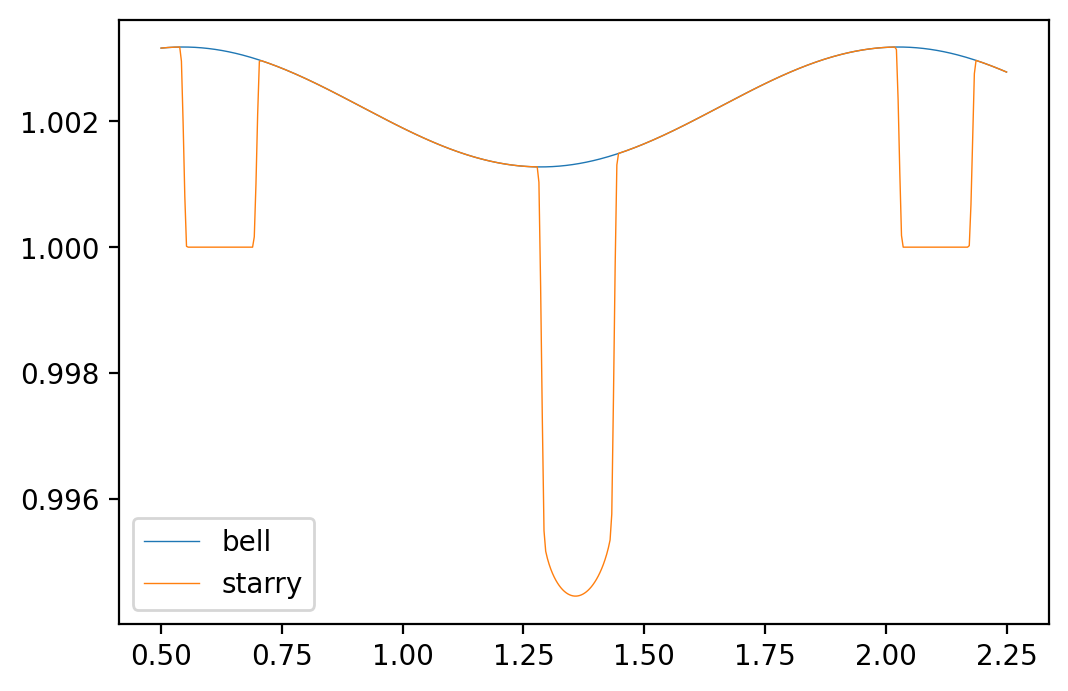

In [1449]:
plt.gcf().set_facecolor('white')
plt.plot(time-2458414.0, 1+bell(d, amp, off, time), marker = "None", lw =0.5, label = "bell")
plt.plot(time-2458414.0, stary(d, amp, off, tref, time), marker = "None", lw = 0.5, label = "starry")
axes = plt.gca()

plt.legend()
plt.show()